In [59]:
# Refer https://scipy-cookbook.readthedocs.io/items/CoupledSpringMassSystem.html for Modelling system of ODE

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import *
%matplotlib widget

def model_(z, t, p, i, dt):
    """
    ODE: 
    dz/dt =z(μ+iω−|z|^2)
    x' = x(μ - (x^2 + y^2)) - ωy + εIext(t)
    y' = y(μ - (x^2 + y^2)) + ωx
    ω' = -εIext(t)sinФ  [ω' = -εIext(t)y (Modified version)]
    
    Variables:
    Iext(t) is real signal (I0sin(ω_t + φ_))
    Ф: Instantaneous phase of z i.e. tan-1(x/y)
    
    Arguments:
        z: state variables of dynamical system (x, y) - Hopf oscillator
        t: Instantaneous time
        p: parameters [mu, omega, beta, e]
        i: External input signal [I0, omega0, phi0]
        
    Question:
        1. Frequency adaptation works if dynamics of equation is described by 
            ω' = -εIext(t)y instead of ω' = -εIext(t)sinФ. Why is that?
            Section 3 of this paper mentions the same: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7993838/
    
    Misc:
        1. sinФ - tangential component on limit cycle
        2. Synchronization seems to be depending upon amplitude of external perturbation
        
    TODO:
        1. Hopf oscillator without any input
        2. Hopf oscillator with signle frequency external input (Real valued)
            a. Real component in-phase and complex component pi/2 phase difference
            b. e: Synchronization happens fast as weight increases
        3. Hopf oscillator with multiple frequency external input
        4. Change external input format to raw data
        
    Idea:
        1. Covergence is fast and better when -e*Iext*y is used instead of sinФ. 
            Can this improve performance of oscillatory neural network?
        2. Can we use 4-state system to learn amplitude in one-shot itself?
        
    Observation:
        1. Using y instead of sinФ helps in achieving asymptotic synchronization fast, 
            however, it fails to synchronize when there are multiple frequency
        2. ***Using sinФ instead of y helps achieving synchronization with nearest frequency 
            when input contains multiple frequency components? But why?
            
    Raw data:
        1. Duration:
        2. No of samples:
        3. Range of values:
    """
    x, y, omega = z
    mu, beta, e = p
    I0, omega10, omega20, I1, I2, phi0 = i
    
    #Iext = I0*sin(omega0*t + phi0)
    #How to provide input from raw data points instead of time function? 
    #Maybe put it in array and use time as index to get data from array!
    #Iext = I1*sin(omega10*t + phi0) + I2*sin(omega20*t + phi0) #0.5 AND 0.1
    #sin_phi = y/(x**2 + y**2)
    
    # TODO: change to system of ODE
    #f = [ x*(mu - (x**2 + y**2)) - omega*y + e*Iext, 
    #      y*(mu - (x**2 + y**2)) + omega*x,
    #      -e*Iext*sin_phi]
    
    X = np.zeros(t)
    Y = np.zeros(t)
    OMG = np.zeros(t)
    
    print(t)
    
    for time in range(t):
        #print(omega)
        #print(x)
        
        Iext = I1*sin(omega10*(time+1)*dt + phi0) + I2*sin(omega20*(time+1)*dt + phi0)
        sin_phi = y/(x**2 + y**2) #Error might be due to floating point number
        
        dx = (x*(mu - (x**2 + y**2)) - omega*y + e*Iext)*dt
        dy = (y*(mu - (x**2 + y**2)) + omega*x)*dt
        domega = (-e*Iext*sin_phi)*dt
        #print(dx, dt)
        x = x + dx;
        y = y + dy;
        omega = omega + domega
        
#         x = round(x, 2)
#         y = round(y, 2)
#         omega = round(omega, 2)
        
        #print(x, y, omega)
        
        X[time] = x
        Y[time] = y
        OMG[time] = omega
        
    #print(X, Y, OMG)
    return X, Y, OMG
    #return f

def model(z, t, p, i):
    """
    ODE: 
    dz/dt =z(μ+iω−|z|^2)
    x' = x(μ - (x^2 + y^2)) - ωy + εIext(t)
    y' = y(μ - (x^2 + y^2)) + ωx
    ω' = -εIext(t)sinФ  [ω' = -εIext(t)y (Modified version)]
    
    Variables:
    Iext(t) is real signal (I0sin(ω_t + φ_))
    Ф: Instantaneous phase of z i.e. tan-1(x/y)
    
    Arguments:
        z: state variables of dynamical system (x, y) - Hopf oscillator
        t: Instantaneous time
        p: parameters [mu, omega, beta, e]
        i: External input signal [I0, omega0, phi0]
        
    Question:
        1. Frequency adaptation works if dynamics of equation is described by 
            ω' = -εIext(t)y instead of ω' = -εIext(t)sinФ. Why is that?
            Section 3 of this paper mentions the same: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7993838/
    
    Misc:
        1. sinФ - tangential component on limit cycle
        2. Synchronization seems to be depending upon amplitude of external perturbation
        
    TODO:
        1. Hopf oscillator without any input
        2. Hopf oscillator with signle frequency external input (Real valued)
            a. Real component in-phase and complex component pi/2 phase difference
            b. e: Synchronization happens fast as weight increases
        3. Hopf oscillator with multiple frequency external input
        4. Change external input format to raw data
        
    Idea:
        1. Covergence is fast and better when -e*Iext*y is used instead of sinФ. 
            Can this improve performance of oscillatory neural network?
        2. Can we use 4-state system to learn amplitude in one-shot itself?
        
    Observation:
        1. Using y instead of sinФ helps in achieving asymptotic synchronization fast, 
            however, it fails to synchronize when there are multiple frequency
        2. ***Using sinФ instead of y helps achieving synchronization with nearest frequency 
            when input contains multiple frequency components? But why?
            
    Raw data:
        1. Duration:
        2. No of samples:
        3. Range of values:
    """
    x, y, omega = z
    #x, y = z
    mu, beta, e = p
    I0, omega10, omega20, I1, I2, phi0 = i
    
    #Iext = I0*sin(omega0*t + phi0)
    #How to provide input from raw data points instead of time function? 
    #Maybe put it in array and use time as index to get data from array!
    Iext = I1*sin(omega10*t + phi0) + I2*sin(omega20*t + phi0) #0.5 AND 0.1
    sin_phi = y/(x**2 + y**2)
    
    # TODO: change to system of ODE
    f = [ x*(mu - (x**2 + y**2)) - omega*y + e*Iext, 
          y*(mu - (x**2 + y**2)) + omega*x,
          -e*Iext*(y/(x**2 + y**2))]
    
    # f = [ x*(mu - (x**2 + y**2)) - omega20*y + e*Iext, 
    #       y*(mu - (x**2 + y**2)) + omega20*x]
    
    return f

def model2(z, t, p, i):
    #x, y, omega = z
    I0, omega10, omega20, I1, I2, phi0 = i
    Iext = I1*sin(omega10*t + phi0) + I2*sin(omega20*t + phi0)
    
    N = int(len(z)/3)
    temp = np.zeros([N, 3])
    x = np.zeros([N, 1])
    y = np.zeros([N, 1])
    omega = np.zeros([N, 1])
    
    temp[:] = z.reshape(N, 3)
    #print("Z: \n", temp)
    x[:] = temp[:,0][:,None]
    y[:] = temp[:,1][:,None]
    omega[:] = temp[:,2][:,None]
    
    # print("X: \n", x)
    # print("Y: \n", y)
    # print("OMEGA: \n", omega)
    
    x = x*(mu - (x**2 + y**2)) - omega*y + e*Iext
    y = y*(mu - (x**2 + y**2)) + omega*x
    omega = -e*Iext*(y/(x**2 + y**2))
    
    temp = [x, y, omega]
    temp = np.asarray(temp)
    temp = temp.flatten()

    return temp

def Iext(t, i):
    I0, omega10, omega20, I1, I2, phi0 = i
    #print(t)
    #print(omega10)
    return [(I1*sin(omega10*i + phi0) + I2*sin(omega20*i + phi0)) for i in t] 

In [61]:
# Initial Parameter values
mu = 100
omega = 5
beta = -1
# Beware while setting initial condition for x0 and y0!
x0 = -1
y0 = 0
e = 1
I0 = 6
omega0 = 19
phi0 = pi/3

X = np.zeros(2)
X.fill(-1)
Y = np.zeros(2)
Y.fill(0)
OMEGA = np.zeros(2)
OMEGA[0] = 3
OMEGA[1] = 10

# Plot variables
stoptime = 500.0 #Reserved for odeint
numpoints = 2500 #Reserved for odeint
NEPOCHS = 100000
#DT does makes a difference in convergence time
dt = 0.001

# Model arguments
p = [mu, beta, e]
z = [x0, y0, omega]

z = np.asarray([X, Y, OMEGA]).T
print("z: \n", z)
z = z.flatten()
# print(z.shape)
# #z = [x0, y0]

t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]
i = [I0, 1, 9, 6, 11, phi0]

#wsol = odeint(model, z, t, args=(p,i,))

#Cut from here!

#Z, H = f(X, Y);

#print(X)
#print(Y)
#print(Z)
#print(H)

#ax = plt.axes(projection='3d')
#ax.scatter(X, Y, Z, 'gray')
#ax.plot_wireframe(X, Y, Z, color ='green')
#ax.plot_surface(X, Y, Z, cmap ='viridis', edgecolor ='green')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
#ax.set_ylabel('Frequency 2')
#ax.set_xlabel('Frequency 1')
#ax.set_zlabel('Oscillator steady state frequency')
#ax.set_title('Initial oscillator frequency 20Hz')
#plt.show()

#plt.pcolormesh( H , cmap = 'summer' )

# Call the ODE solver.
wsol = odeint(model2, z, t, args=(p,i,))
#x, y, omega = model_(z, NEPOCHS, p, i, dt);
#t_ = [(i+1)*dt for i in range(NEPOCHS)]
#wsol = odeint(model, z, t, args=(p,i,))


# plot the complex numbers in x,t plane
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(2)
plt.plot(t, wsol[:,4])
#plt.plot(t_, omega)

# f = plt.figure()
# f.set_figwidth(10)
# f.set_figheight(2)
# #plt.plot(t, Iext(t, i), label="External input")
# plt.plot(t_, x, label="Reconstructed signal")
# #plt.plot(t, wsol[:,0], label="Reconstructed signal")


# plot the complex numbers in x,y,t plane
#ax = plt.axes(projection='3d')
#ax.plot3D(t, wsol[:,0], wsol[:,1], 'gray')

# Plot the complex numbers in x,y plane
#plt.scatter(wsol[:,0], wsol[:,1])
#plt.ylabel('Imaginary')
#plt.xlabel('Real')
#plt.show()

wsol = [] #Uncomment this to clear buffer

z: 
 [[-1.  0.  3.]
 [-1.  0. 10.]]


/home/jupyter-avinash/ranjan_env/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/home/jupyter-avinash/ranjan_env/lib/python3.9/site-packages/matplotlib/ticker.py:2222: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale
/home/jupyter-avinash/ranjan_env/lib/python3.9/site-packages/matplotlib/ticker.py:2255: RuntimeWarning: overflow encountered in multiply
  ticks = np.arange(low, high + 1) * step + best_vmin


OverflowError: cannot convert float infinity to integer

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis, CTRL fixes aspect', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))

In [ ]:
#wo = 10
#w1 = 20
#w2 = 0
#step = 1
omega = 20; 
omega0 = 40;
Ampl_max = 6;
step_size = 1;
ITR_FREQ = int(abs(omega0 - omega)/step_size);
ITR_AMP = int(Ampl_max/step_size);

#Constant Amplitude for Iext
def f(x, y):
    A1 = Ampl_max;
    A2 = Ampl_max;
    #x = x.flatten()
    #y = y.flatten()
    #print(x, y)
    row = len(x)
    col = len(x[0])
    sol = np.zeros((row, col)); #Assuming both x and y have same length
    sol2 = np.zeros((row, col)); 
    for r in range(row):
        for c in range(col):
            F1 = x[r][c];
            F2 = y[r][c];
            i = [I0, F1, F2, A1, A2, phi0]
            expct = min(abs(omega0-F1), abs(omega0-F2)) #Expected freq delat
            wsol = odeint(model, z, t, args=(p,i,))
            sol[r][c] = (F2 if (wsol[:,2][numpoints-1]>omega) else F1)
            sol2[r][c] = 0 if (sol[r][c] == F1) else 1 
            #sol2[r][c] = 0 if (abs(sol[r][c]-omega0) != expct) else 1
            sol2[r][c] = 1 if (sol[r][c] == F1) else 2
            #print(F1, F2, wsol[:,2][numpoints-1])
            
    #print(sol)
    return sol, sol2
    
X_ = np.linspace(omega-step_size, 0, ITR_FREQ)
Y_ = np.linspace(omega+step_size, omega0, ITR_FREQ)
X, Y = np.meshgrid(X_, Y_)



[26. 27. 28. 29. 30.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
0.0 26.0 24.872622624262796 20.0
0.0 27.0 24.872622624262796 20.0
0.0 28.0 24.872622624262796 20.0
0.0 29.0 24.872622624262796 20.0
0.0 30.0 24.872622624262796 20.0
0.1 26.0 24.8670141740107 20.0
0.1 27.0 24.871588497321273 20.0
0.1 28.0 24.870739367515256 20.0
0.1 29.0 24.87344538766509 20.0
0.1 30.0 24.867906985036555 20.0
0.2 26.0 24.903426340996162 20.0
0.2 27.0 24.885707675674308 20.0
0.2 28.0 24.885289406494184 20.0
0.2 29.0 24.883765006653515 20.0
0.2 30.0 24.872351927040164 20.0
0.30000000000000004 26.0 24.93623899563664 20.0
0.30000000000000004 27.0 24.887575356113494 20.0
0.30000000000000004 28.0 24.894156599991838 20.0
0.30000000000000004 29.0 24.888609993457514 20.0
0.30000000000000004 30.0 24.885324571814245 20.0
0.4 26.0 24.931491593441162 20.0
0.4 27.0 24.912332404649792 20.0
0.4 28.0 24.883595043558014 20.0
0.4 29.0 24.87995293618329 20.0
0.4 30.0 24.894903436398

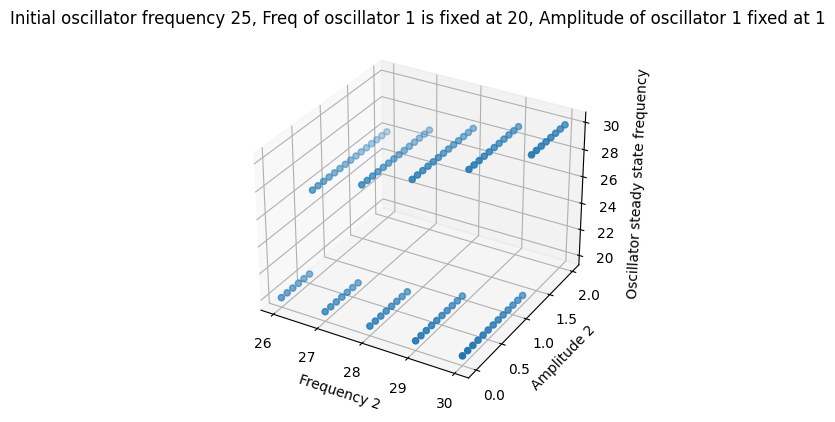

In [8]:
omega = 25; #oscillator frequency
omega0 = 30; #initial frequency of Iext
Ampl_max = 2;
f_step_size = 1; #Don't change scale. might give wrong result!!
a_step_size = 0.1; #Don't change scale. might give wrong result!!
ITR_FREQ = int(abs(omega0 - omega)/f_step_size);
ITR_AMP = int(Ampl_max/a_step_size);

#One constant frequency for Iext
def f(x, y):
    row = len(x)
    col = len(x[0])
    sol = np.zeros((row, col)); #Assuming both x and y have same length
    for r in range(row):
        for c in range(col):
            A1_ = 1; #Ampl_max;
            A2_ = y[r][c]; #Varying amplitude of second component in Iext
            F1_ = 2*omega - omega0 #omega - abs(omega0 - omega)/2; #Fixing one of the frequency to 10Hz
            F2_ = x[r][c]; 
            p_ = [mu, beta, e] #Don't delete this
            z_ = [x0, y0, omega] #Don't delete this
            i_ = [A1_, F1_, F2_, A1_, A2_, phi0]
            wsol = []
            wsol = odeint(model, z_, t, args=(p_,i_,))
            sol[r][c] = (F2_ if (wsol[:,2][numpoints-1]>omega) else F1_)
            #print("\n")
            #print(A1, F1);
            #print(A2, F2);
            #print(wsol[:,2][numpoints-1], sol[r][c])
            print(A2_, F2_, wsol[:,2][numpoints-1], sol[r][c])
            
    #print(sol)
    return sol

X_ = np.linspace(omega+f_step_size, omega0, ITR_FREQ)
Y_ = np.linspace(0, Ampl_max, ITR_AMP+1)
X, Y = np.meshgrid(X_, Y_)
print(X_, Y_)
Z = f(X, Y);

ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, 'gray')
#ax.plot_wireframe(X, Y, Z, color ='green')
#ax.plot_surface(X, Y, Z, cmap ='viridis', edgecolor ='green')
#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_ylabel('Amplitude 2')
ax.set_xlabel('Frequency 2')
ax.set_zlabel('Oscillator steady state frequency')
ax.set_title('Initial oscillator frequency ' + str(omega) + ', Freq of oscillator 1 is fixed at '+ str(2*omega - omega0) +', Amplitude of oscillator 1 fixed at 1')
plt.show()